In [2]:
# OS与shutil的使用  创建训练目录
import os,shutil
download_path = '/home/jkk/data/train'
obj_path = '/home/jkk/data/small_train'
os.mkdir(obj_path)

train_path = os.path.join(obj_path,'train')
dog_train_path = os.path.join(train_path,'dogs')
cat_train_path = os.path.join(train_path,'cats')
os.mkdir(train_path)

test_path = os.path.join(obj_path,'test')
dog_test_path = os.path.join(test_path,'dogs')
cat_test_path = os.path.join(test_path,'cats')
os.mkdir(test_path)

val_path = os.path.join(obj_path,'val')
dog_val_path = os.path.join(val_path,'dogs')
cat_val_path = os.path.join(val_path,'cats')
os.mkdir(val_path)

os.mkdir(dog_test_path)
os.mkdir(dog_train_path)
os.mkdir(dog_val_path)

os.mkdir(cat_test_path)
os.mkdir(cat_train_path)
os.mkdir(cat_val_path)

In [3]:
#复制文件
dog_train = [download_path+'/dog.{}.jpg'.format(i) for i in range(1000)]
for i,dog in enumerate(dog_train):
    shutil.copy(dog,dog_train_path+'/{}.jpg'.format(i))

dog_test = [download_path+'/dog.{}.jpg'.format(i) for i in range(1000,1500)]
for i,dog in enumerate(dog_test):
    shutil.copy(dog,dog_test_path+'/{}.jpg'.format(i))

dog_val = [download_path+'/dog.{}.jpg'.format(i) for i in range(1500,2000)]
for i,dog in enumerate(dog_val):
    shutil.copy(dog,dog_val_path+'/{}.jpg'.format(i))

cat_train = [download_path+'/cat.{}.jpg'.format(i) for i in range(1000)]
for i,cat in enumerate(cat_train):
    shutil.copy(cat,cat_train_path+'/{}.jpg'.format(i))

cat_test = [download_path+'/cat.{}.jpg'.format(i) for i in range(1000,1500)]
for i,cat in enumerate(cat_test):
    shutil.copy(cat,cat_test_path+'/{}.jpg'.format(i))

cat_val = [download_path+'/cat.{}.jpg'.format(i) for i in range(1500,2000)]
for i,cat in enumerate(cat_val):
    shutil.copy(cat,cat_val_path+'/{}.jpg'.format(i))


In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics=['acc'])

In [5]:
# 利用keras自带的图像处理
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path,target_size=(150,150),batch_size=20,class_mode='binary')
val_gen = val_datagen.flow_from_directory(val_path,target_size=(150,150),batch_size=20,class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# 拟合
his = model.fit_generator(train_gen,steps_per_epoch=100,epochs=10,validation_data=val_gen,validation_steps=50)


Epoch 1/10
100/100 [==============================] - 12s 119ms/step - loss: 0.0918 - acc: 0.9680 - val_loss: 1.5267 - val_acc: 0.7140
Epoch 2/10
100/100 [==============================] - 12s 118ms/step - loss: 0.0866 - acc: 0.9735 - val_loss: 1.9596 - val_acc: 0.6910
Epoch 3/10
100/100 [==============================] - 12s 119ms/step - loss: 0.1164 - acc: 0.9680 - val_loss: 1.6674 - val_acc: 0.7240
Epoch 4/10
100/100 [==============================] - 12s 120ms/step - loss: 0.1137 - acc: 0.9730 - val_loss: 1.3152 - val_acc: 0.6840
Epoch 5/10
100/100 [==============================] - 12s 120ms/step - loss: 0.0683 - acc: 0.9795 - val_loss: 1.6708 - val_acc: 0.6970
Epoch 6/10
100/100 [==============================] - 12s 121ms/step - loss: 0.0723 - acc: 0.9800 - val_loss: 2.1565 - val_acc: 0.7080
Epoch 7/10
100/100 [==============================] - 12s 121ms/step - loss: 0.0617 - acc: 0.9840 - val_loss: 1.9956 - val_acc: 0.6900
Epoch 8/10
100/100 [==============================] - 1

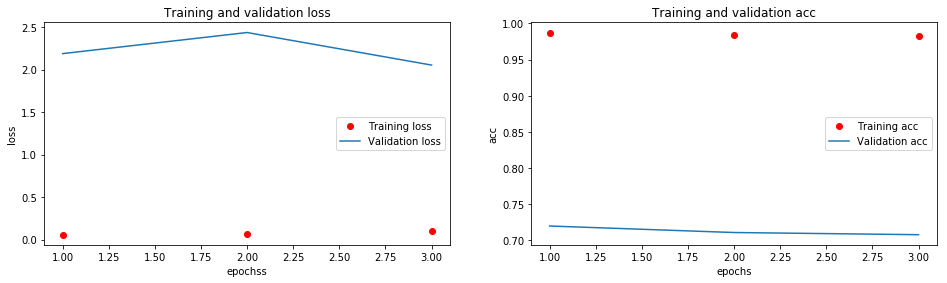

In [11]:
### 生成图像分析
import matplotlib.pyplot as plt
%matplotlib inline

l_val_loss = his.history['val_loss']
l_val_acc = his.history['val_acc']
l_loss = his.history['loss']
l_acc = his.history['acc']

epochs = range(1,len(l_acc)+1)

plt.figure(figsize=(16, 9)) # 设置图表大小
plt.subplot(222) # 拆分子块
plt.plot(epochs, l_acc, 'ro', label='Training acc') # 'bo'蓝点
plt.plot(epochs, l_val_acc, label='Validation acc') # 'b'蓝线

plt.title('Training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.subplot(221)
plt.plot(epochs, l_loss, 'ro', label='Training loss') # 'bo'蓝点
plt.plot(epochs, l_val_loss, label='Validation loss') # 'b'蓝线

plt.title('Training and validation loss')
plt.xlabel('epochss')
plt.ylabel('loss')
plt.legend()

plt.show()

In [15]:
# 最佳模型
his = model.fit_generator(train_gen,steps_per_epoch=100,epochs=1,validation_data=val_gen,validation_steps=50)


Epoch 1/1
100/100 [==============================] - 12s 119ms/step - loss: 0.5017 - acc: 0.7595 - val_loss: 0.5816 - val_acc: 0.7000


In [16]:
model.save_weights('no_zengjia.h5')